In [477]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 

In [478]:
#load/create df
f = open('State+of+the+Union+Addresses+1970-2016.txt')
lines = f.readlines()
bigline = " ".join(lines)
stars = bigline.split('***')
splits = [s.split('\n') for s in stars[1:]]
tups = [(s[2], s[3], s[4], "".join(s[5:])) for s in splits]
speech_df = pd.DataFrame(tups)

In [479]:
#dirty reformatting 
speech_df.columns = ['Type', 'Name', 'Date', 'Speech']
speech_df = speech_df.drop('Type', 1)
speech_df = speech_df[:][178:]
speech_df = speech_df.reset_index()
speech_df = speech_df.drop('index',1)
speech_df['Name'][36:] = speech_df['Date'][36:]
speech_df['Date'][36] = speech_df['Speech'][36][0:17]
speech_df['Date'][37] = speech_df['Speech'][37][0:17]
speech_df['Date'][38] = speech_df['Speech'][38][0:18]
speech_df['Date'][39] = speech_df['Speech'][39][0:17]
speech_df['Date'][40] = speech_df['Speech'][40][0:17]
speech_df['Date'][41] = speech_df['Speech'][41][0:17]
speech_df['Date'][42] = speech_df['Speech'][42][0:18]
speech_df['Date'][43] = speech_df['Speech'][43][0:17]
speech_df['Date'][44] = speech_df['Speech'][44][0:17]
speech_df['Date'][45] = speech_df['Speech'][45][0:17]
speech_df['Speech'][36] = speech_df['Speech'][36][18:]
speech_df['Speech'][37] = speech_df['Speech'][37][18:]
speech_df['Speech'][38] = speech_df['Speech'][38][19:]
speech_df['Speech'][39] = speech_df['Speech'][39][18:]
speech_df['Speech'][40] = speech_df['Speech'][40][18:]
speech_df['Speech'][41] = speech_df['Speech'][41][18:]
speech_df['Speech'][42] = speech_df['Speech'][42][19:]
speech_df['Speech'][43] = speech_df['Speech'][43][18:]
speech_df['Speech'][44] = speech_df['Speech'][44][18:]
speech_df['Speech'][45] = speech_df['Speech'][45][18:]

In [480]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')
count_vect.fit(speech_df['Speech'])
X = count_vect.transform(speech_df['Speech'])
freq = zip(count_vect.get_feature_names(), np.asarray(X.sum(axis=0)).ravel())
df = pd.DataFrame(freq)
df.columns = ['word', 'count']

In [481]:
#top words in entire corpus
df.sort('count', ascending = False)

C:\Users\Michael\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from IPython.kernel.zmq import kernelapp as app


,word,count
675,america,1199
7243,people,1101
6678,new,1030
11112,world,868
11159,year,806
11164,years,792
676,american,770
2231,congress,761
4537,government,687
11098,work,613


In [483]:
#http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/histretSP.html
#import stock returns
returns = pd.read_csv('returns.csv')

In [484]:
#reformat to only include years: 69-87, 89-91, 93-00, 00-15
test = pd.DataFrame(returns[0:19][:])
test1 = pd.DataFrame(returns[20:23][:])
test2 = pd.DataFrame(returns[24:32][:])
test3 = pd.DataFrame(returns[31:][:])
new_ret = pd.concat([test, test1, test2, test3])
new_ret = new_ret.reset_index()
new_ret = new_ret.drop('index', axis = 1)
i = 0
for each in new_ret['S&P 500']:
    new_ret['S&P 500'][i] = each.strip('%')
    i+=1


C:\Users\Michael\Anaconda\lib\site-packages\IPython\kernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [485]:
#append to speech df
speech_df['S&P_ret'] = new_ret['S&P 500'].astype(float)

In [486]:
#create wordcounts
speech_df['word_counts'] = ""
for i in xrange(0,len(speech_df)):
    speech_df['word_counts'].iloc[i] = zip(count_vect.get_feature_names(), np.asarray(X[i].sum(axis=0)).ravel())

In [488]:
#list of words pertaining to economy
#pull out a list of indexes for words/similar words
#search each 
word_list = ['econom', 'tax', 'spend', 'budget', 'business', 
             'job', 'wealth', 'poor', 'recession', 'depression', 
             'income', 'deficit', 'expand']

idx = []

for i in word_list:
    temp = []
    for each in xrange(0,len(df)):
        if df['word'].iloc[each].find(i) > -1:
            temp.append(each)
    idx.append(temp)

#create empty columns
for each in word_list:
    speech_df[each] = ""

In [546]:
#count words in column
for word in xrange(0,len(word_list)):
    i = 0
    for speech in speech_df['word_counts']:
        total = 0.0
        for each in counts[word]:
            total = total + speech[each][1]
        speech_df[word_list[word]].iloc[i] = total
        i+=1
        

In [547]:
speech_df

,Name,Date,Speech,S&P_ret,word_counts,econom,tax,spend,budget,business,job,wealth,poor,recession,depression,income,deficit,expand
0,Richard Nixon,"January 22, 1970","Mr. Speaker, Mr. President, my colleagues in...",-8.24,"[(00, 0), (000, 0), (02, 0), (03, 0), (04, 0),...",7,1,5,7,1,2,2,1,0,0,2,1,3
1,Richard Nixon,"January 22, 1971","Mr. Speaker, Mr. President, my colleagues in...",3.56,"[(00, 0), (000, 1), (02, 0), (03, 0), (04, 0),...",9,4,2,8,3,4,1,0,0,0,2,0,2
2,Richard Nixon,"January 20, 1972","Mr. Speaker, Mr. President, my colleagues in...",14.22,"[(00, 0), (000, 1), (02, 0), (03, 0), (04, 0),...",1,10,4,4,1,5,1,1,0,0,4,0,2
3,Richard Nixon,"February 2, 1973",To the Congress of the United States: The t...,18.76,"[(00, 0), (000, 0), (02, 0), (03, 0), (04, 0),...",4,9,6,0,1,4,0,0,0,0,1,0,1
4,Richard Nixon,"January 30, 1974","Mr. Speaker, Mr. President, my colleagues in...",-14.31,"[(00, 0), (000, 2), (02, 0), (03, 0), (04, 0),...",6,6,2,1,0,6,0,1,3,0,3,0,4
5,Gerald R. Ford,"January 15, 1975","Mr. Speaker, Mr. Vice President, Members of ...",-25.90,"[(00, 0), (000, 4), (02, 0), (03, 0), (04, 0),...",18,29,11,7,6,6,0,1,1,0,10,3,0
6,Gerald R. Ford,"January 19, 1976","Mr. Speaker, Mr. Vice President, Members of ...",37.00,"[(00, 0), (000, 5), (02, 0), (03, 0), (04, 0),...",18,19,6,14,5,18,0,3,4,0,6,0,1
7,Gerald R. Ford,"January 12, 1977","Mr. Speaker, Mr. Vice President, Members of ...",23.83,"[(00, 0), (000, 1), (02, 0), (03, 0), (04, 0),...",15,7,4,4,0,8,0,2,4,0,1,0,3
8,Jimmy Carter,"January 19, 1978",Two years ago today we had the first caucus ...,-6.98,"[(00, 0), (000, 0), (02, 0), (03, 0), (04, 0),...",26,18,4,7,8,14,0,1,0,1,3,4,1
9,Jimmy Carter,"January 25, 1979",Tonight I want to examine in a broad sense t...,6.51,"[(00, 0), (000, 1), (02, 0), (03, 0), (04, 0),...",14,1,3,7,2,6,0,2,3,0,3,3,1


In [548]:
corr_df = speech_df[word_list].astype(float)
corr_df['S&P_returns'] = speech_df['S&P_ret']

In [549]:
corr_df.corr()

,econom,tax,spend,budget,business,job,wealth,poor,recession,depression,income,deficit,expand,S&P_returns
econom,1.000000,0.360545,0.405620,0.666590,0.551643,0.344599,0.389797,0.725681,0.327362,0.027306,0.773112,0.272253,0.808817,0.134699
tax,0.360545,1.000000,0.502747,0.335185,0.482476,0.370167,0.206664,0.273462,0.259708,0.272922,0.532114,0.392023,0.174127,-0.015745
spend,0.405620,0.502747,1.000000,0.487212,0.201357,0.124941,0.127073,0.254297,0.236574,-0.024904,0.430133,0.593890,0.167582,-0.088051
budget,0.666590,0.335185,0.487212,1.000000,0.244018,0.034271,0.268370,0.722511,0.128636,-0.015741,0.677992,0.177492,0.712505,0.156450
business,0.551643,0.482476,0.201357,0.244018,1.000000,0.823798,0.518045,0.316367,0.439961,0.516208,0.424980,0.562949,0.438289,0.187612
job,0.344599,0.370167,0.124941,0.034271,0.823798,1.000000,0.604438,0.123464,0.327553,0.362661,0.229716,0.556960,0.219260,0.195923
wealth,0.389797,0.206664,0.127073,0.268370,0.518045,0.604438,1.000000,0.254956,0.162901,0.181312,0.377103,0.387227,0.411764,-0.062959
poor,0.725681,0.273462,0.254297,0.722511,0.316367,0.123464,0.254956,1.000000,0.122899,-0.112624,0.696532,0.136011,0.791331,0.321000
recession,0.327362,0.259708,0.236574,0.128636,0.439961,0.327553,0.162901,0.122899,1.000000,0.335608,0.128528,0.386472,0.120915,-0.138673
depression,0.027306,0.272922,-0.024904,-0.015741,0.516208,0.362661,0.181312,-0.112624,0.335608,1.000000,0.002217,0.360489,0.002133,-0.062665


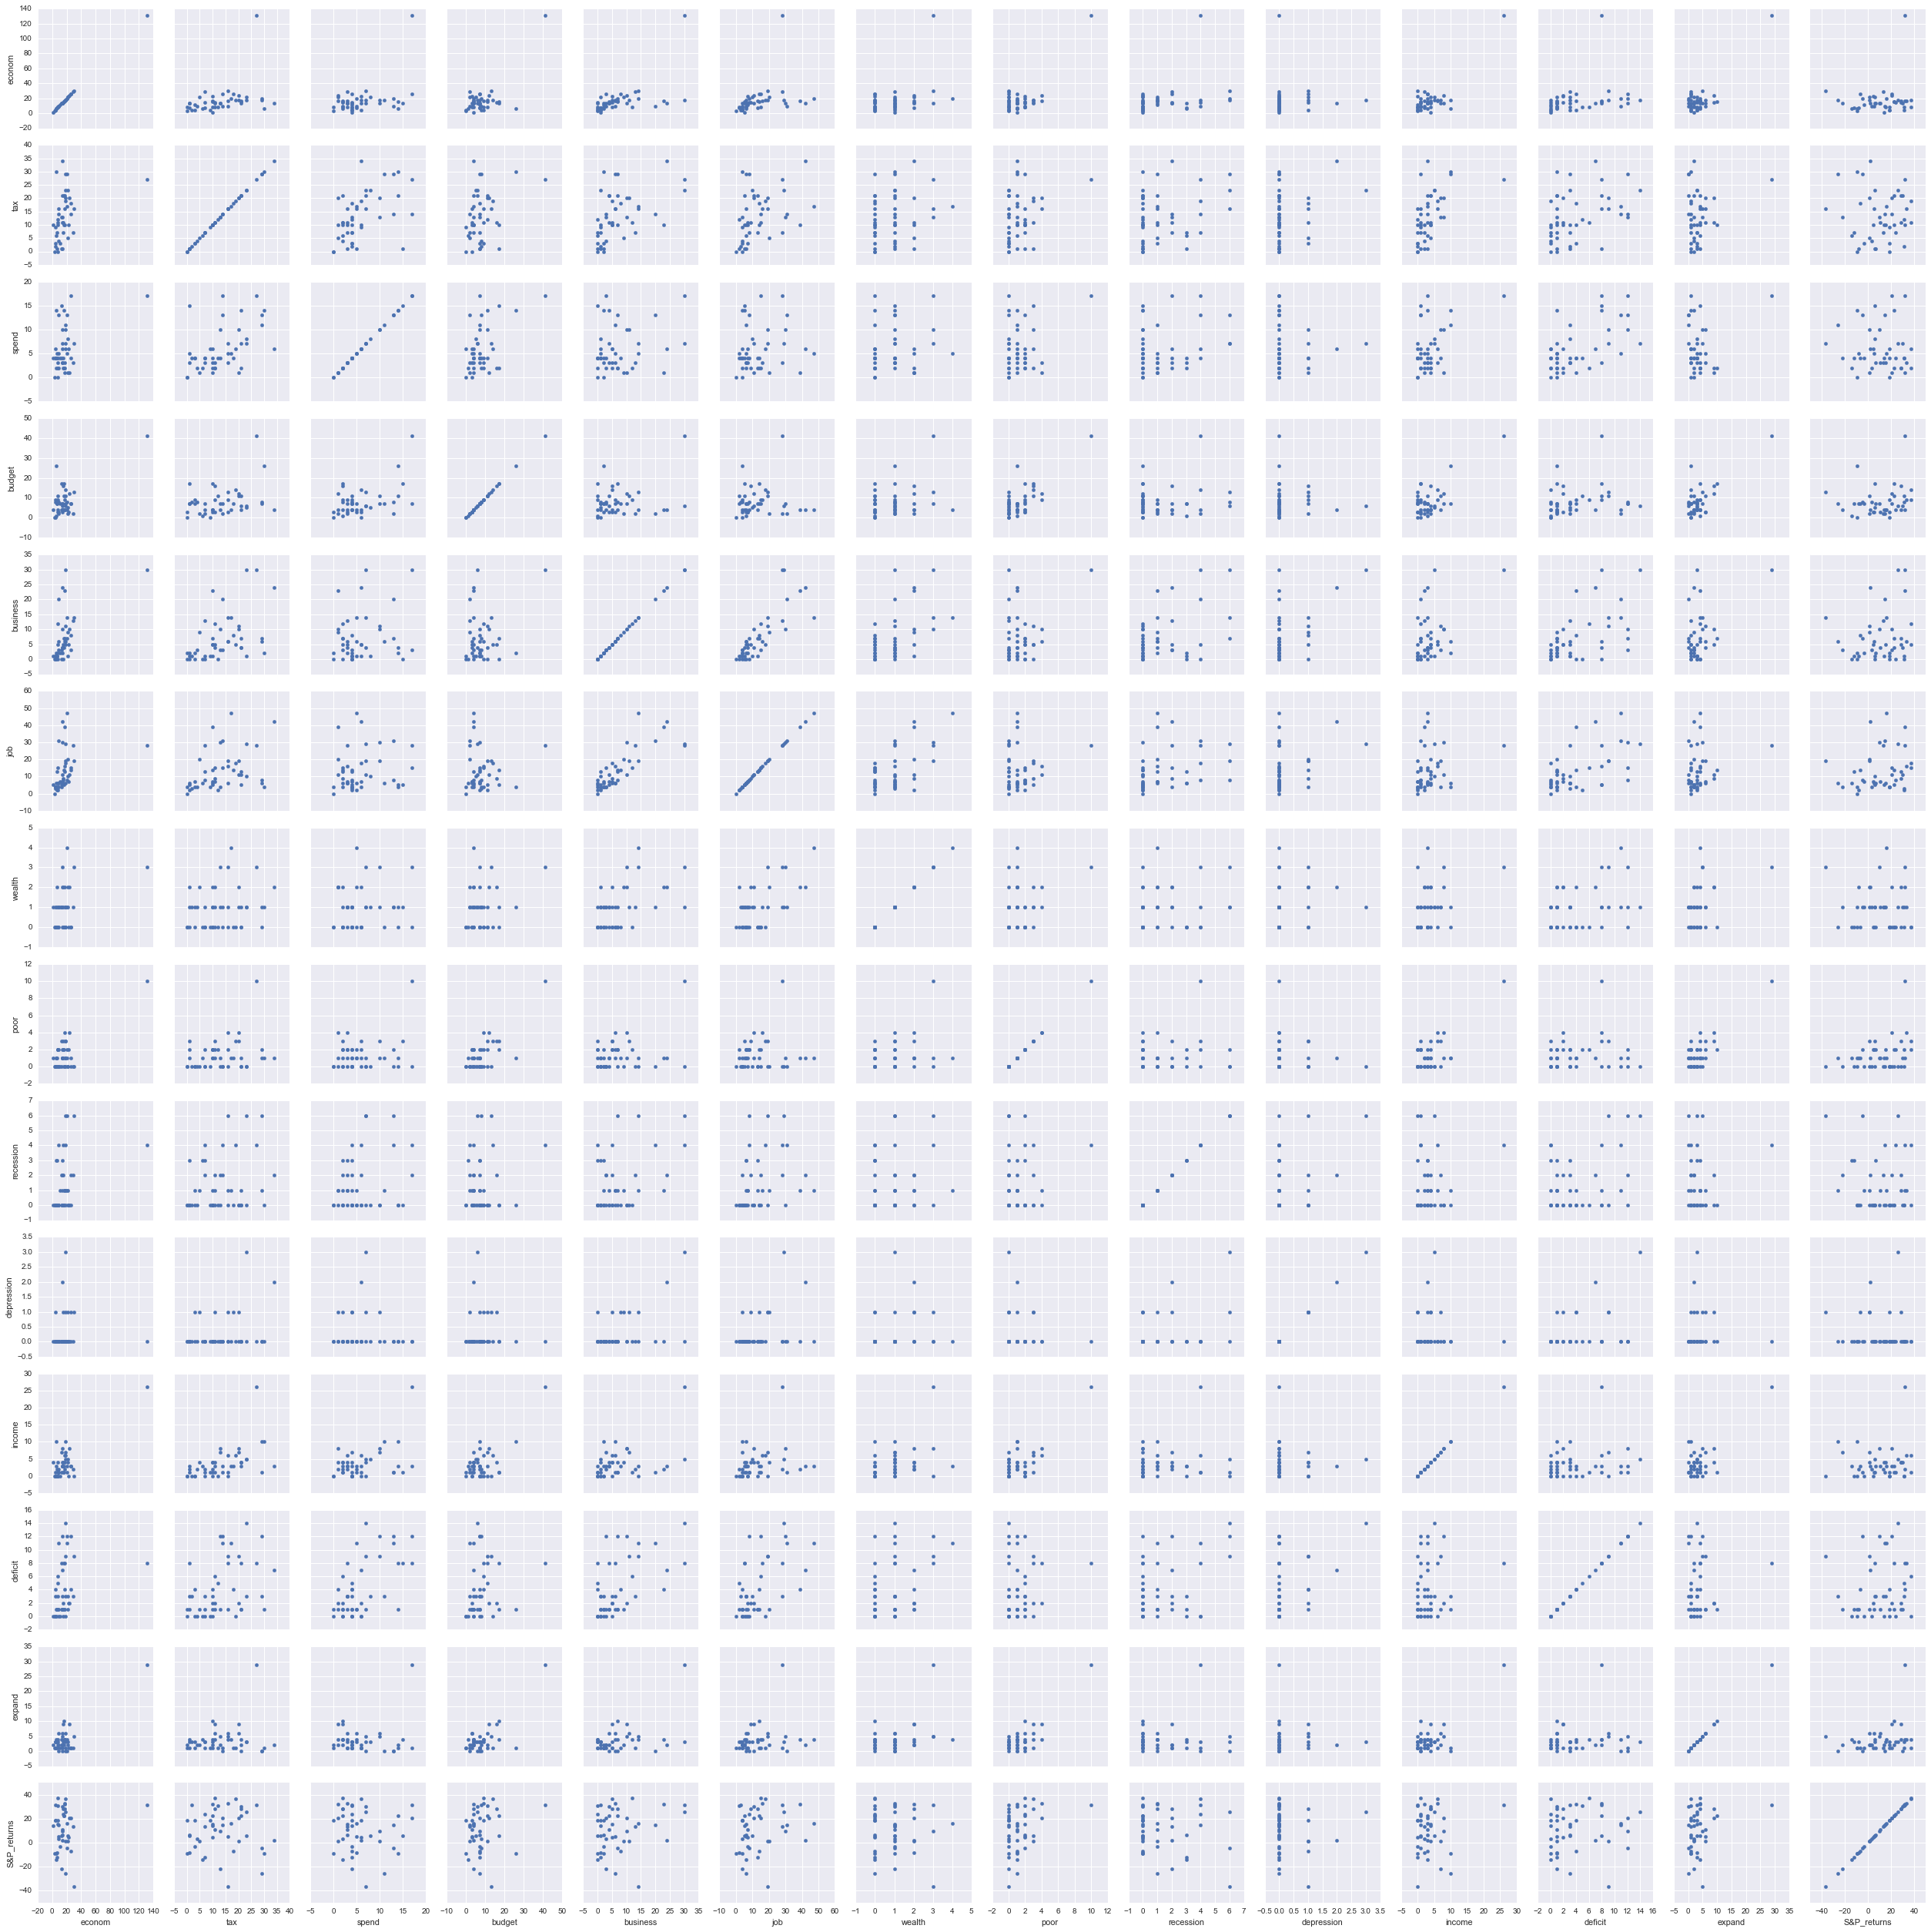

In [518]:
g = sb.PairGrid(corr_df)
g.map(plt.scatter)
plt.savefig('corr.png')
